# Exercise notebook 3: Transforming and Combining Data

This Jupyter notebook is for Week 3 of The Open University's [_Learn to code for Data Analysis_](http://futurelearn.com/courses/learn-to-code) course.

This notebook has all Week 3 code examples and coding exercises. Remember to start by running the code in this notebook. You will need to add a code cell below each task to complete it.

You'll come across steps in the FutureLearn course directing you to this notebook. Once you've done the exercise, go back to FutureLearn to discuss it with your fellow learners and course facilitators and mark it as complete.

In [2]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *

## Exercise 1: Creating the data

Dataframes can be constructed from scratch as follows.

In [3]:
headings = ['Country', 'GDP (US$)']
table = [
  ['UK', 2678454886796.7],    # 1st row
  ['USA', 16768100000000.0],  # 2nd row
  ['China', 9240270452047.0], # and so on...
  ['Brazil', 2245673032353.8],
  ['South Africa', 366057913367.1]
]
gdp = DataFrame(columns=headings, data=table)
gdp

,Country,GDP (US$)
0,UK,2.678455e+12
1,USA,1.676810e+13
2,China,9.240270e+12
3,Brazil,2.245673e+12
4,South Africa,3.660579e+11


And similarly for the life expectancy of those born in 2013...

In [4]:
headings = ['Country name', 'Life expectancy (years)']
table = [
  ['China', 75],
  ['Russia', 71],  
  ['United States', 79],
  ['India', 66],
  ['United Kingdom', 81]
]
life = DataFrame(columns=headings, data=table)
life

,Country name,Life expectancy (years)
0,China,75
1,Russia,71
2,United States,79
3,India,66
4,United Kingdom,81


### Task

Create a dataframe with all five BRICS countries and their population, in thousands of inhabitants, in 2013. The values (given in week 1) are: Brazil 200362, Russian Federation	142834, India 1252140, China 1393337, South Africa 52776.

In [5]:
headings = ['Country name', 'Population 1000s']
table = [
    ['Brazil', 200362],
    ['Russian Federation', 142834],
    ['India', 125140],
    ['China', 1393337],
    ['South Africa', 52776],
]
pop = DataFrame(columns=headings, data=table)
pop

,Country name,Population 1000s
0,Brazil,200362
1,Russian Federation,142834
2,India,125140
3,China,1393337
4,South Africa,52776


**Now go back to the 'Creating the data' step in FutureLearn to discuss and mark it complete.**

## Exercise 2: Defining functions

The following function, written in two different ways, rounds a number to the nearest million. It calls the Python function `round()` which rounds a decimal number to the nearest integer. If two integers are equally near, it rounds to the even integer.

In [6]:
def roundToMillions (value):
    result = round(value / 1000000)
    return result

In [7]:
def roundToMillions (value):
    return round(value / 1000000)

To test a function, write expressions that check for various argument values whether the function returns the expected value in each case.

In [8]:
roundToMillions(4567890.1) == 5

True

In [9]:
roundToMillions(0) == 0  # always test with zero...

True

In [10]:
roundToMillions(-1) == 0 # ...and negative numbers

True

In [11]:
roundToMillions(1499999) == 1 # test rounding to the nearest

True

The next function converts US dollars to British pounds.

In [12]:
def usdToGBP (usd):
    return usd / 1.564768 # average rate during 2013 

usdToGBP(0) == 0

True

In [13]:
usdToGBP(1.564768) == 1

True

In [14]:
usdToGBP(-1) < 0

True

### Tasks

1. Define a few more test cases for both functions.
- Why can't you use `roundToMillions()` to round the population to millions of inhabitants? Write a new function and test it. **You need to write this function in preparation for Exercise 4.**
- Write a function to convert US dollars to your local currency. If your local currency is USD or GBP, convert to Euros. Look up online what was the average exchange rate in 2013.

In [15]:
def roundPopToMillions (value):
    return round(value / 1000)



**Now go back to the 'Defining functions' step in FutureLearn to discuss and mark it complete.**

## Exercise 3: What if...?

The next function uses the full form of the conditional statement to expand the abbreviated country names UK and USA and leave other names unchanged.

In [16]:
def expandCountry (name):
    if name == 'UK':
        return 'United Kingdom'
    elif name == 'USA':
        return 'United States'
    else:
        return name

expandCountry('India') == 'India'

True

Here is the same function, written differently, using the simplest form of the conditional statement, without the `elif` and `else` parts.

In [17]:
def expandCountry (name):
    if name == 'UK':
        name = 'United Kingdom'
    if name == 'USA':
        name = 'United States'
    if name == 'St. Lucia':
        name = 'Saint Lucia'
    return name

print(expandCountry('UK'))

United Kingdom


### Tasks

1. Write more tests.
- Explain why the second version of the function works. Note how the code is indented.
- Extend both versions to expand 'St. Lucia' to 'Saint Lucia'.
- Write a function to translate some country names from their original language to English, e.g. 'Brasil' to 'Brazil', 'España' to 'Spain' and 'Deutschland' to 'Germany'.
- Can you think of a different way of expanding abbreviated country names? You're not expected to write any code. Hint: this is a course about data tables.

**Now go back to the 'What if...?' Exercise 3 step in FutureLearn to discuss and mark it complete.**

## Exercise 4: Applying functions

A one-argument function can be applied to each cell in a column, in order to obtain a new column with the converted values.

In [18]:
gdp['Country name'] = gdp['Country'].apply(expandCountry)
gdp

,Country,GDP (US$),Country name
0,UK,2.678455e+12,United Kingdom
1,USA,1.676810e+13,United States
2,China,9.240270e+12,China
3,Brazil,2.245673e+12,Brazil
4,South Africa,3.660579e+11,South Africa


Given that `apply()` is a column method that returns a column, it can be **chained**, to apply several conversions in one go.

In [19]:
gdp['GDP (£m)'] = gdp['GDP (US$)'].apply(usdToGBP).apply(roundToMillions)
gdp

,Country,GDP (US$),Country name,GDP (£m)
0,UK,2.678455e+12,United Kingdom,1711727
1,USA,1.676810e+13,United States,10716029
2,China,9.240270e+12,China,5905202
3,Brazil,2.245673e+12,Brazil,1435148
4,South Africa,3.660579e+11,South Africa,233937


Applying the conversion functions in a different order will lead to a different result.

In [20]:
gdp['GDP (US$)'].apply(roundToMillions).apply(usdToGBP).apply(round)

0     1711727
1    10716029
2     5905201
3     1435148
4      233938
Name: GDP (US$), dtype: int64

The original columns can be discarded.

In [21]:
headings = ['Country name', 'GDP (£m)']
gdp = gdp[headings]
gdp

,Country name,GDP (£m)
0,United Kingdom,1711727
1,United States,10716029
2,China,5905202
3,Brazil,1435148
4,South Africa,233937


### Task

Take the dataframe you created for Exercise 1, and apply to its population column the rounding function you wrote in Exercise 2.

In [22]:
pop['Population Millions'] = pop['Population 1000s'].apply(roundPopToMillions)

print(pop)

         Country name  Population 1000s  Population Millions
0              Brazil            200362                  200
1  Russian Federation            142834                  143
2               India            125140                  125
3               China           1393337                 1393
4        South Africa             52776                   53


**Now go back to the 'Applying functions' step in FutureLearn to discuss and mark it complete.**

## Exercise 5: Joining left, right and centre

At this point, both tables have a common column, 'Country name', with fully expanded country names.

In [23]:
life

,Country name,Life expectancy (years)
0,China,75
1,Russia,71
2,United States,79
3,India,66
4,United Kingdom,81


In [24]:
gdp

,Country name,GDP (£m)
0,United Kingdom,1711727
1,United States,10716029
2,China,5905202
3,Brazil,1435148
4,South Africa,233937


A **left join** takes the rows of the left table and adds the columns of the right table. 

In [25]:
merge(gdp, life, on='Country name', how='left')

,Country name,GDP (£m),Life expectancy (years)
0,United Kingdom,1711727,81.0
1,United States,10716029,79.0
2,China,5905202,75.0
3,Brazil,1435148,NaN
4,South Africa,233937,NaN


A **right join** takes the rows from the right table, and adds the columns of the left table.

In [26]:
merge(gdp, life, on='Country name', how='right')

,Country name,GDP (£m),Life expectancy (years)
0,United Kingdom,1711727.0,81
1,United States,10716029.0,79
2,China,5905202.0,75
3,Russia,NaN,71
4,India,NaN,66


An **outer join** takes the union of the rows, i.e. it has all the rows of the left and right joins.

In [27]:
merge(gdp, life, on='Country name', how='outer')

,Country name,GDP (£m),Life expectancy (years)
0,United Kingdom,1711727.0,81.0
1,United States,10716029.0,79.0
2,China,5905202.0,75.0
3,Brazil,1435148.0,NaN
4,South Africa,233937.0,NaN
5,Russia,NaN,71.0
6,India,NaN,66.0


An **inner join** takes the intersection of the rows (i.e. the common rows) of the left and right joins.

In [28]:
gdpVsLife = merge(gdp, life, on='Country name', how='inner')
gdpVsLife

,Country name,GDP (£m),Life expectancy (years)
0,United Kingdom,1711727,81
1,United States,10716029,79
2,China,5905202,75


### Task

Join your population dataframe (from Exercise 4) with `gdpVsLife`, in four different ways, and note the differences.

In [33]:
merge(pop, gdpVsLife, on='Country name', how='left')
#merge(pop, gdpVsLife, on='Country name', how='right')
#merge(pop, gdpVsLife, on='Country name', how='outer')
#merge(pop, gdpVsLife, on='Country name', how='inner')

,Country name,Population 1000s,Population Millions,GDP (£m),Life expectancy (years)
0,Brazil,200362,200,NaN,NaN
1,Russian Federation,142834,143,NaN,NaN
2,India,125140,125,NaN,NaN
3,China,1393337,1393,5905202.0,75.0
4,South Africa,52776,53,NaN,NaN


**Now go back to the 'Joining left, right and centre' step in FutureLearn to discuss and mark it complete.**

## Exercise 6: Constant variables

Constants are used to represent fixed values (e.g. strings and numbers) that occur frequently in a program. Constant names are conventionally written in uppercase, with underscores to separate multiple words.

In [34]:
GDP_USD = 'GDP (US$)'
GDP_GBP = 'GDP (£m)'
GDP_USD
COUNTRY_NAME = 'Country name'
POP_1000S = 'Population 1000s'
POP_MIL = 'Population Millions'

### Task

Look through the code you wrote so far, and rewrite it using constants, when appropriate.

**Now go back to the 'Constant variables' step in FutureLearn to discuss and mark it complete.**

## Exercise 7: Getting real

It is possible to directly download data from the World Bank, for a particular time period and indicator, like the GDP in current US dollars. The indicator name is given in the URL of the webpage about the dataset.

Getting the data directly from the World Bank only works with Anaconda (or a paid SageMathCloud account) and requires an Internet connection. It can take some time to download the data, depending on the speed of your connection and the load on the World Bank server. Moreover, the World Bank occasionally changes the layout of the data, which could break the code in the rest of this notebook. 

To avoid such problems I have saved the World Bank data into CSV files, given in the Futurelearn step. The data is in a column with the same name as the indicator. Hence I declare the indicator names as constants, to be used later when processing the dataframe.

In [35]:
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
gdpReset = read_csv('WB GDP 2013.csv')

LIFE_INDICATOR = 'SP.DYN.LE00.IN'
lifeReset = read_csv('WB LE 2013.csv')

The CSV files were obtained in two steps, which are shown next in commented code because we already have the CSV files. 

First the data was obtained directly from the World Bank using a particular function in pandas, and indicating the desired indicator and time period.

In [ ]:
# from pandas.io.wb import download

# YEAR = 2013
# gdpWB = download(indicator=GDP_INDICATOR, country='all', start=YEAR, end=YEAR)
# lifeWB = download(indicator=LIFE_INDICATOR, country='all', start=YEAR, end=YEAR)
# lifeWB.head()

The downloaded dataframe has descriptive row names instead of the usual 0, 1, 2, etc. In other words, the dataframe's index is given by the country and year instead of integers. Hence the second step was to reset the index. 

In [ ]:
# gdpReset = gdpWB.reset_index()
# lifeReset = lifeWB.reset_index()

Resetting the index put the dataframes into the usual form, which was saved to CSV files. 

In [36]:
lifeReset.head()

,country,year,SP.DYN.LE00.IN
0,Arab World,2013,70.631305
1,Caribbean small states,2013,71.901964
2,Central Europe and the Baltics,2013,76.127583
3,East Asia & Pacific (all income levels),2013,74.604619
4,East Asia & Pacific (developing only),2013,73.657617


### Tasks

1. Create a data frame with the World Bank's data on population, using the CSV file provided in the Futurelearn step. **This dataframe will be used in the remaining exercises.**
- If you're using Anaconda, uncomment the code above and run it to check that you can get the GDP and life expectancy data directly from the World Bank. **Don't forget to afterwards comment again the code.**
- If you have extra time, you can alternatively obtain the population data directly from the World Bank: go to their [data page](http://data.worldbank.org/), search for population, select the total population indicator, note its name in the URL, copy the commented code above and adapt it to get the data and reset its index. Note that the World Bank may have changed its data format since this was written and therefore you may have to do extra steps to get a dataframe in the same shape as the CSV file we provide, with three columns for country name, year and population.

**Now go back to the 'Getting real' step in FutureLearn to discuss and mark it complete.**

In [41]:
POP_INDICATOR = 'SP.POP.TOTL'
popReset = read_csv('WB POP 2013.csv')
popReset
popReset[POP_INDICATOR]

0      3.770967e+08
1      6.975819e+06
2      1.037137e+08
3      2.248867e+09
4      2.006073e+09
5      3.372839e+08
6      8.988371e+08
7      2.624163e+08
8      5.065580e+08
9      4.617132e+08
10     6.827300e+08
11     1.390566e+09
12     3.261374e+08
13     1.064428e+09
14     6.194873e+08
15     5.194196e+08
16     9.100636e+08
17     5.783956e+09
18     6.055058e+08
19     2.836264e+09
20     4.093244e+08
21     3.506492e+08
22     5.178450e+09
23     3.517208e+08
24              NaN
25     1.263179e+09
26     2.053161e+07
27     2.285709e+06
28     2.979314e+07
29     1.697997e+09
           ...     
218    9.600379e+06
219    8.089346e+06
220    2.178942e+07
221    8.111894e+06
222    5.021346e+07
223    6.745142e+07
224    1.180069e+06
225    6.928719e+06
226    1.051390e+05
227    1.348240e+06
228    1.088650e+07
229    7.501020e+07
230    5.240088e+06
231    3.310300e+04
232    9.876000e+03
233    3.657339e+07
234    4.548960e+07
235    9.039978e+06
236    6.410678e+07


## Exercise 8: Cleaning up

The expression `frame[m:n]` represents a dataframe with only row `m` to row `n-1` (or until the end if `n` is omitted) of `frame`.

In [42]:
lifeReset[0:3]

,country,year,SP.DYN.LE00.IN
0,Arab World,2013,70.631305
1,Caribbean small states,2013,71.901964
2,Central Europe and the Baltics,2013,76.127583


In [43]:
lifeReset[240:]

,country,year,SP.DYN.LE00.IN
240,Vanuatu,2013,71.669244
241,"Venezuela, RB",2013,74.074415
242,Vietnam,2013,75.756488
243,Virgin Islands (U.S.),2013,79.624390
244,West Bank and Gaza,2013,73.203341
245,"Yemen, Rep.",2013,63.583512
246,Zambia,2013,59.237366
247,Zimbabwe,2013,55.633000


The first 34 rows (from 0 to 33) of World Bank dataframes are aggregated data for country groups, and are thus discarded.

In [44]:
gdpCountries = gdpReset[34:]
lifeCountries = lifeReset[34:]
gdpCountries.head()

,country,year,NY.GDP.MKTP.CD
34,Afghanistan,2013,2.045894e+10
35,Albania,2013,1.278103e+10
36,Algeria,2013,2.097035e+11
37,American Samoa,2013,NaN
38,Andorra,2013,3.249101e+09


Rows with missing data are dropped.

In [45]:
gdpData = gdpCountries.dropna()
lifeData = lifeCountries.dropna()
gdpData.head()

,country,year,NY.GDP.MKTP.CD
34,Afghanistan,2013,2.045894e+10
35,Albania,2013,1.278103e+10
36,Algeria,2013,2.097035e+11
38,Andorra,2013,3.249101e+09
39,Angola,2013,1.383568e+11


The year column is discarded.

In [46]:
COUNTRY = 'country'
headings = [COUNTRY, GDP_INDICATOR]
gdpClean = gdpData[headings]
headings = [COUNTRY, LIFE_INDICATOR]
lifeClean = lifeData[headings]
lifeClean.head()

,country,SP.DYN.LE00.IN
34,Afghanistan,60.028268
35,Albania,77.537244
36,Algeria,74.568951
39,Angola,51.866171
40,Antigua and Barbuda,75.778659


### Task

Clean the population dataframe you created in Exercise 7.


If in Exercise 7 you chose to directly get the population data from the World Bank instead of using the provided CSV file, you may need to remove more (or fewer) than 34 rows at the start of the dataframe due to changes done by the World Bank to its data reporting.

In [63]:
headings = [COUNTRY, POP_INDICATOR]
popClean = popReset[34:].dropna()[headings]
popClean.head()

,country,SP.POP.TOTL
34,Afghanistan,30682500.0
35,Albania,2897366.0
36,Algeria,38186135.0
37,American Samoa,55302.0
38,Andorra,75902.0


**Now go back to the 'Clearning up' step in FutureLearn to discuss and mark it complete.**

## Exercise 9: Joining and transforming

The two dataframes can now be merged with an inner join.

In [64]:
gdpVsLifeAll = merge(gdpClean, lifeClean, on=COUNTRY, how='inner')
gdpVsLifeAll.head()

,country,NY.GDP.MKTP.CD,SP.DYN.LE00.IN
0,Afghanistan,2.045894e+10,60.028268
1,Albania,1.278103e+10,77.537244
2,Algeria,2.097035e+11,74.568951
3,Angola,1.383568e+11,51.866171
4,Antigua and Barbuda,1.200588e+09,75.778659


The dollars are converted to million pounds.

In [65]:
GDP = 'GDP (£m)'
column = gdpVsLifeAll[GDP_INDICATOR]
gdpVsLifeAll[GDP] = column.apply(usdToGBP).apply(roundToMillions)
gdpVsLifeAll.head()

,country,NY.GDP.MKTP.CD,SP.DYN.LE00.IN,GDP (£m)
0,Afghanistan,2.045894e+10,60.028268,13075
1,Albania,1.278103e+10,77.537244,8168
2,Algeria,2.097035e+11,74.568951,134016
3,Angola,1.383568e+11,51.866171,88420
4,Antigua and Barbuda,1.200588e+09,75.778659,767


The life expectancy is rounded, by applying the `round()` function.

In [66]:
LIFE = 'Life expectancy (years)'
gdpVsLifeAll[LIFE] = gdpVsLifeAll[LIFE_INDICATOR].apply(round)
gdpVsLifeAll.head()

,country,NY.GDP.MKTP.CD,SP.DYN.LE00.IN,GDP (£m),Life expectancy (years)
0,Afghanistan,2.045894e+10,60.028268,13075,60
1,Albania,1.278103e+10,77.537244,8168,78
2,Algeria,2.097035e+11,74.568951,134016,75
3,Angola,1.383568e+11,51.866171,88420,52
4,Antigua and Barbuda,1.200588e+09,75.778659,767,76


The original GDP and life expectancy columns are dropped.

In [68]:
headings = [COUNTRY, GDP, LIFE]
gdpVsLifeClean = gdpVsLifeAll[headings]
gdpVsLifeClean.head()

,country,GDP (£m),Life expectancy (years)
0,Afghanistan,13075,60
1,Albania,8168,78
2,Algeria,134016,75
3,Angola,88420,52
4,Antigua and Barbuda,767,76


### Tasks

1. Merge `gdpVsLifeClean` with the population dataframe obtained in the previous exercise. 
- Round the population value to the nearest million.
- Remove the original population column.

In [71]:
gdpVsLifePlusPop = merge(gdpVsLifeClean, popClean, on=COUNTRY, how='inner')
column = gdpVsLifePlusPop[POP_INDICATOR]
gdpVsLifePlusPop[POP_MIL] = column.apply(roundToMillions)
gdpVsLifePlusPop.head()
headings = [COUNTRY, GDP, LIFE, POP_MIL]
gdpVsLifePlusPopClean = gdpVsLifePlusPop[headings]
gdpVsLifePlusPopClean.head()

,country,GDP (£m),Life expectancy (years),Population Millions
0,Afghanistan,13075,60,31
1,Albania,8168,78,3
2,Algeria,134016,75,38
3,Angola,88420,52,23
4,Antigua and Barbuda,767,76,0


**Now go back to the 'Joining and transforming' step in FutureLearn to discuss and mark it complete.**

## Exercise 10: Correlation

The Spearman rank correlation coefficient between GDP and life expectancy, and the corresponding p-value are calculated as follows.

In [72]:
from scipy.stats import spearmanr

gdpColumn = gdpVsLifeClean[GDP]
lifeColumn = gdpVsLifeClean[LIFE]
(correlation, pValue) = spearmanr(gdpColumn, lifeColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.501023238967
It is statistically significant.


### Task

Calculate the correlation between GDP and population.

In [74]:
popColumn = gdpVsLifePlusPopClean[POP_MIL]
(correlation, pValue) = spearmanr(gdpColumn, popColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('p value is', '%f' % pValue, 'It is statistically significant.')
else:
    print('p value is', pValue, 'It is not statistically significant.')

The correlation is 0.705636722861
p value is 0.000000 It is statistically significant.


**Now go back to the 'Correlation' step in FutureLearn to discuss and mark it complete.**

## Exercise 11: Scatterplots

The dataframe method `plot()` can also produce scatterplots. The `logx` and `logy` arguments  set a logarithmic scale on the corresponding axis.

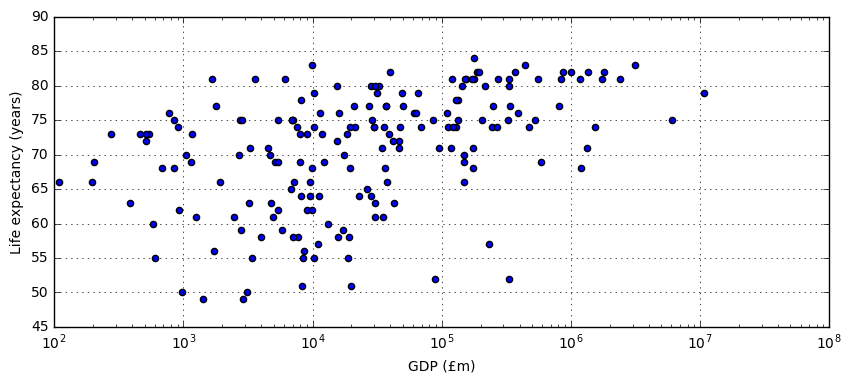

In [75]:
%matplotlib inline
gdpVsLifeClean.plot(x=GDP, y=LIFE, kind='scatter', grid=True, logx=True, figsize = (10, 4))

### Tasks

- Swap the axes of the scatterplot, i.e. show the GDP in the y axis and the life expectancy in the x axis.
- Display a scatterplot of the GDP and the population.

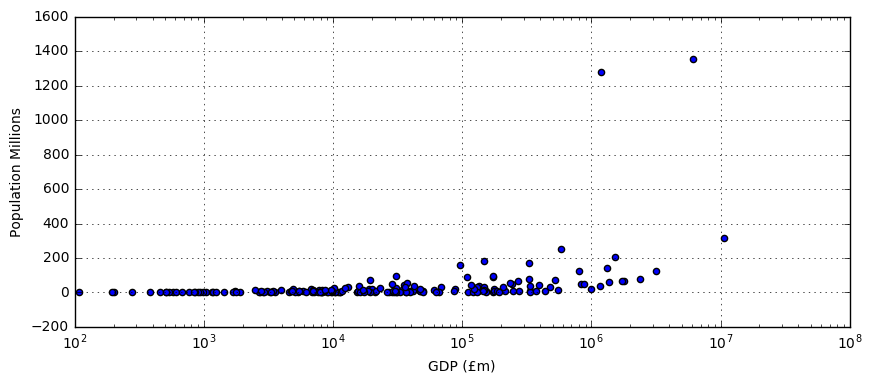

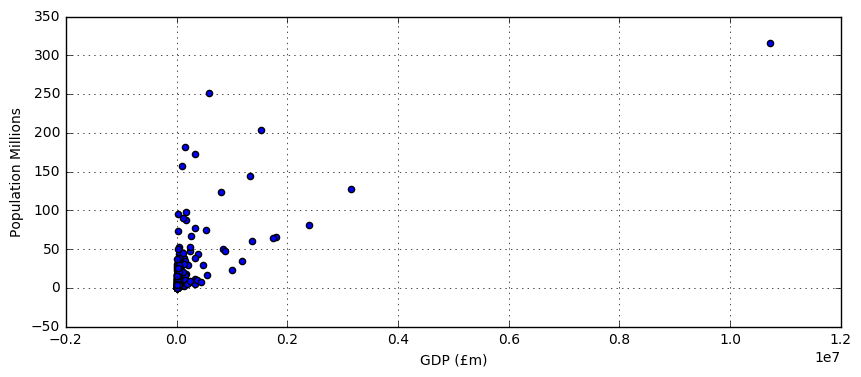

In [88]:
gdpVsLifePlusPopClean.plot(x=GDP, y=POP_MIL, kind='scatter', grid=True, logx=True, figsize = (10, 4))
gdpVsLifePlusPopClean[gdpVsLifePlusPopClean[POP_MIL] > 1200]
gdpVsLifePlusPopClean2 = gdpVsLifePlusPopClean[gdpVsLifePlusPop[POP_MIL] < 1200]
gdpVsLifePlusPopClean2.plot(x=GDP, y=POP_MIL, kind='scatter', grid=True, figsize = (10, 4))

**Now go back to the 'Scatterplots'step in FutureLearn to discuss and mark it complete.**